In [1]:
%matplotlib inline 
import pandas as pd

In [2]:
titles = [] # list of news titles
categories = [] # list of news categories
labels = [] # list of different categories (without repetitions)
nlabels = 4 # number of different categories
lnews = [] # list of dictionaries with two fields: one for the news and the other for its category

In [3]:
def import_data():
    global titles, labels, categories
    # importing news aggregator data via Pandas (Python Data Analysis Library)
    news = pd.read_csv("news.csv")
    # function 'head' shows the first 5 items in a column (or
    # the first 5 rows in the DataFrame)
    print(news.head())
    categories = news['CATEGORY']
    titles = news['TITLE']
    labels = sorted(list(set(categories))) 

In [4]:
%time import_data()

   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PUBLISHER  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  CATEGORY                          STORY             HOSTNAME     TIMESTAMP  
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com  1.394470e+12  
1        b  ddUyU0VZz0BRneMiox

In [5]:
from collections import Counter

def count_data(labels,categories):    
    c = Counter(categories)
    cont = dict(c)
    # total number of news
    tot = sum(list(cont.values()))     
    d = {
        "category" : labels,
        "news" : [cont[l] for l in labels],
        "percent" : [cont[l]/tot for l in labels]
    }
   
    print(pd.DataFrame(d))   
    print("total \t",tot) 
    
    return cont

cont = count_data(labels,categories)

  category    news   percent
0        b  115967  0.274531
1        e  152469  0.360943
2        m   45639  0.108042
3        t  108344  0.256485
total 	 422419


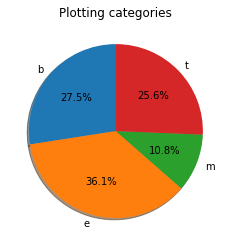

In [6]:
import pylab as pl # useful for drawing graphics
def categories_pie_plot(cont,tit):
    global labels
    sizes = [cont[l] for l in labels]
    pl.pie(sizes, explode=(0, 0, 0, 0), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    pl.title(tit)
    pl.show()
 
categories_pie_plot(cont,"Plotting categories")


In [7]:
from sklearn.utils import shuffle # Shuffle arrays in a consistent way
X_train = []
y_train = []
X_test = []
y_test = []

def split_data():
    global titles, categories
    global X_train, y_train, X_test, y_test,labels
    N = len(titles)
    Ntrain = int(N * 0.7)    
    # Let's shuffle the data
    titles, categories = shuffle(titles, categories, random_state=0)
    X_train = titles[:Ntrain]
    y_train = categories[:Ntrain]
    X_test = titles[Ntrain:]
    y_test = categories[Ntrain:]

In [8]:
%time split_data()

Wall time: 381 ms


In [9]:
cont2 = count_data(labels,y_train)


  category    news   percent
0        b   81238  0.274738
1        e  106844  0.361334
2        m   31930  0.107984
3        t   75681  0.255945
total 	 295693


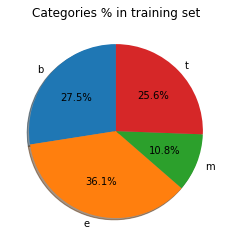

In [10]:
categories_pie_plot(cont2,"Categories % in training set")

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 
from sklearn import metrics 
import numpy as np
import pprint

In [12]:
# lmats = [] # list of confussion matrix 
nrows = nlabels
ncols = nlabels
# conf_mat_sum = np.zeros((nrows, ncols))
# f1_acum = [] # list of f1-score


In [13]:
def train_test():
    global X_train, y_train, X_test, y_test, labels 
    #lmats, \
     #       conf_mat_sum, f1_acum, ncategories
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])
    text_clf = text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print(predicted)
    return predicted


In [14]:
%time predicted = train_test()


['b' 'b' 't' ... 'b' 't' 'b']
Wall time: 6.86 s


In [15]:
metrics.accuracy_score(y_test, predicted)

0.9238120038508277

In [16]:
print(metrics.classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

           b       0.90      0.91      0.90     34729
           e       0.95      0.97      0.96     45625
           m       0.97      0.85      0.90     13709
           t       0.90      0.90      0.90     32663

    accuracy                           0.92    126726
   macro avg       0.93      0.91      0.92    126726
weighted avg       0.92      0.92      0.92    126726



In [17]:
mat = metrics.confusion_matrix(y_test, predicted,labels=labels)
cm = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
cm

array([[0.91004636, 0.02361139, 0.00552852, 0.06081373],
       [0.01176986, 0.97192329, 0.00192877, 0.01437808],
       [0.06200306, 0.06193012, 0.84601357, 0.03005325],
       [0.0677525 , 0.02510486, 0.00324526, 0.90389738]])

In [18]:
import itertools
import matplotlib.pyplot as plt

In [19]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:5.2f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    

In [20]:
   #

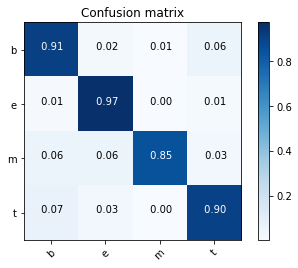

In [21]:
plot_confusion_matrix(cm, labels, title='Confusion matrix')

In [22]:
def resume_data(labels,y_train,f1s):
    c = Counter(y_train)
    cont = dict(c)
    tot = sum(list(cont.values()))
    nlabels = len(labels)
    d = {
        "category" : [labels[i] for i in range(nlabels)],
        "percent" : [cont[labels[i]]/tot for i in range(nlabels)],
        "f1-score" : [f1s[i] for i in range(nlabels)]
    }
   
    print(pd.DataFrame(d))   
    print("total \t",tot) 
    return cont

In [23]:
f1s = metrics.f1_score(y_test, predicted, labels=labels, average=None)
cont3 = resume_data(labels,y_train,f1s)

  category   percent  f1-score
0        b  0.274738  0.903852
1        e  0.361334  0.959225
2        m  0.107984  0.902814
3        t  0.255945  0.903330
total 	 295693


In [24]:
def predict_single(heading):
    global X_train, y_train, X_test, y_test, labels 
    #lmats, \
     #       conf_mat_sum, f1_acum, ncategories
    test=heading
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])
    text_clf = text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(heading)
   
    return predicted

In [25]:
arr=["Young Jeezy Arrested: Illegal Assault Rifle on Tour Bus Leads to Rapper's Arrest","Surgeons to remove 4-year-old's rib to rebuild damaged throat - CBS 3  ...","Ebola causing huge damage to W Africa economies: African Development Bank"]
print(predict_single(arr))

['e' 'm' 'm']
